# Analyze HGB runs

## Import modules

In [2]:
# import modules
import openml
from openml import tasks, flows, runs
import sklearn
from sklearn import feature_selection
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
import pandas as pd
import pprint
from collections import OrderedDict, Counter
import re
import numpy as np
import sys
import openmlcontrib
import matplotlib.pyplot as plt
from itertools import combinations

# enable hgb
enable_hist_gradient_boosting

# set api key
openml.config.apikey = open('.key', 'r').readline().strip('\n')

## Get OpenML runs for HGB flows

In [3]:
# get all supervised classification tasks 
tasks_all = openml.tasks.list_tasks(task_type_id=1, output_format='dataframe', tag = 'OpenML-CC18')

In [4]:
# create dict
my_runs = openml.runs.list_runs(uploader = [8323], flow=[12736])

In [5]:
# create list with run ids
my_runs_ids = []
for i in my_runs.items():
    my_runs_ids.append(i[1]['run_id'])

In [6]:
len(my_runs_ids)

32740

In [7]:
# relevant parameters
param_names = ['l2_regularization',
              'learning_rate',
              'loss',
              'max_bins',
              'max_depth',
              'max_iter',
              'max_leaf_nodes',
              'min_samples_leaf',
              'n_iter_no_change',
              'random_state',
              'scoring',
              'tol',
              'validation_fraction',
              'verbose']

# evaluation metrics
eval_names = ['area_under_roc_curve',
              'average_cost', 
              'f_measure', 
              'kappa', 
              'kb_relative_information_score', 
              'mean_absolute_error', 
              'mean_prior_absolute_error', 
              'number_of_instances', 
              'precision', 
              'predictive_accuracy', 
              'prior_entropy', 
              'recall', 
              'relative_absolute_error', 
              'root_mean_prior_squared_error', 
              'root_mean_squared_error', 
              'root_relative_squared_error',
              'total_cost']

# empty data frame 
df_params = pd.DataFrame(columns=['task_id', 'run_id']+param_names+eval_names)

# loop over runs
for i in my_runs_ids:
    print('.', '', end = '')
    
    # initialize model with parameters from run
    model = openml.runs.initialize_model_from_run(i)
    model_params = model.steps[-1][1].get_params().values()
    model_params_series = pd.Series(list(model_params), index=param_names)
    
    # get evaluation metrics from run
    run = openml.runs.get_run(i)
    run_evals = run.evaluations.values()
    if len(run_evals) < 17: # this needs to be fixed
        run_evals = [np.nan]*17
    run_evals_series = pd.Series(list(run_evals), index=eval_names)
    
    run_id = run.run_id
    task_id = run.task_id
    ids = pd.Series([task_id, run_id], index=['task_id', 'run_id'])
    
    # append row to data frame
    row = pd.concat([ids, model_params_series, run_evals_series])
    df_params = df_params.append(row, ignore_index = True)
    
# order data frame by auc and reset index
df_params = df_params.sort_values('area_under_roc_curve', ascending=False)
df_params = df_params.reset_index(drop = True)  


# convert variables to numeric
df_params = df_params.apply(pd.to_numeric, errors = 'ignore')

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

### Count runs per task

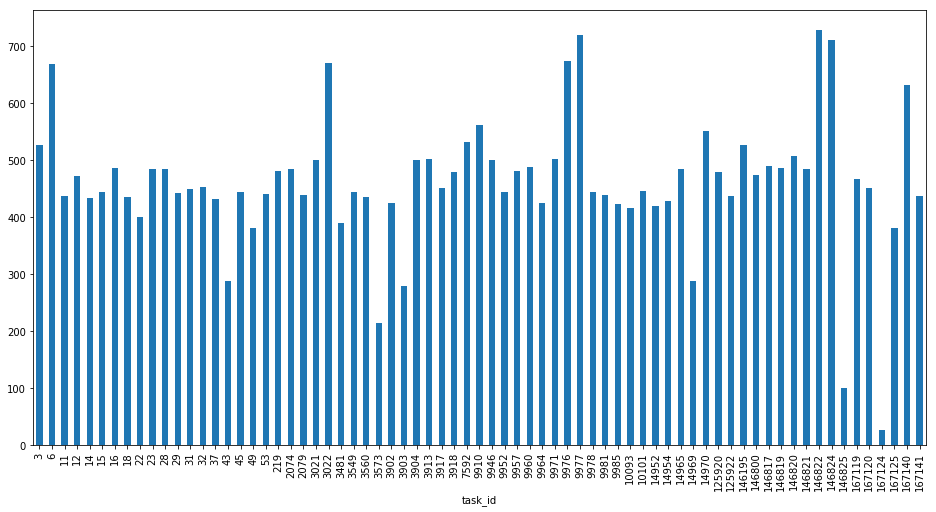

In [10]:
df_params.groupby('task_id').task_id.count().plot(kind = 'bar', figsize = (16,8));

### Task difficulties

In [12]:
df_params

,task_id,run_id,l2_regularization,learning_rate,loss,max_bins,max_depth,max_iter,max_leaf_nodes,min_samples_leaf,...,number_of_instances,precision,predictive_accuracy,prior_entropy,recall,relative_absolute_error,root_mean_prior_squared_error,root_mean_squared_error,root_relative_squared_error,total_cost
0,49,10230263,1.000000e+00,0.100,auto,2,3.0,500,128,9,...,958.0,1.000000,1.000000,0.930954,1.000000,0.028904,0.475873,0.025899,0.054424,0.0
1,146821,10262177,1.000000e+00,0.100,auto,64,8.0,500,64,30,...,1728.0,0.998849,0.998843,1.205751,0.998843,0.008709,0.338114,0.021187,0.062661,0.0
2,49,10288513,1.000000e-09,0.100,auto,8,18.0,300,32,17,...,958.0,1.000000,1.000000,0.930954,1.000000,0.000237,0.475873,0.000532,0.001118,0.0
3,49,10233132,1.000000e+00,1.000,auto,16,13.0,200,64,13,...,958.0,1.000000,1.000000,0.930954,1.000000,0.004645,0.475873,0.009386,0.019724,0.0
4,49,10288414,1.000000e-02,0.100,auto,128,16.0,200,32,16,...,958.0,1.000000,1.000000,0.930954,1.000000,0.003752,0.475873,0.010228,0.021492,0.0
5,49,10288928,1.000000e+00,0.100,auto,64,8.0,500,64,30,...,958.0,1.000000,1.000000,0.930954,1.000000,0.011422,0.475873,0.012939,0.027190,0.0
6,49,10288825,1.000000e-03,0.100,auto,16,14.0,300,32,30,...,958.0,1.000000,1.000000,0.930954,1.000000,0.000541,0.475873,0.000794,0.001668,0.0
7,146821,10262507,1.000000e-06,0.100,auto,256,NaN,200,128,50,...,1728.0,1.000000,1.000000,1.205751,1.000000,0.002460,0.338114,0.009911,0.029313,0.0
8,49,10233128,1.000000e-09,1.000,auto,64,NaN,500,32,28,...,958.0,1.000000,1.000000,0.930954,1.000000,0.000164,0.475873,0.000996,0.002093,0.0
9,49,10288687,1.000000e-06,0.100,auto,64,17.0,500,128,11,...,958.0,1.000000,1.000000,0.930954,1.000000,0.000201,0.475873,0.000668,0.001404,0.0


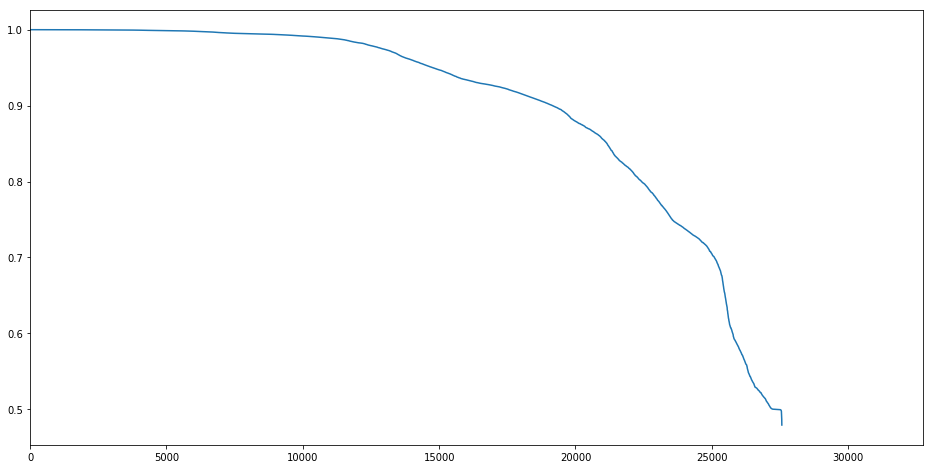

In [11]:
df_params.area_under_roc_curve.plot(figsize = (16,8));

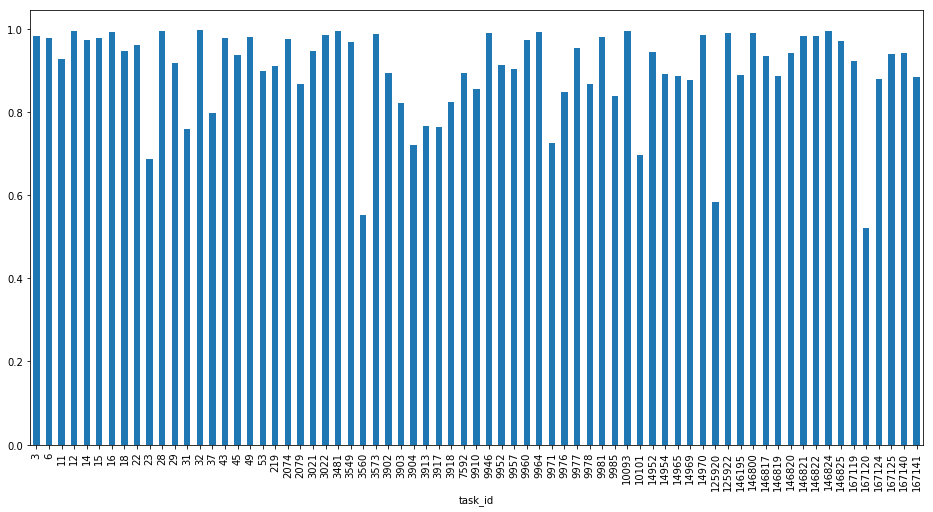

In [81]:
df_params.groupby('task_id')['area_under_roc_curve'].mean().plot(kind = 'bar', figsize = (16,8));

### Check hyperparameters

In [83]:
df_params.iloc[:,2:16]

,l2_regularization,learning_rate,loss,max_bins,max_depth,max_iter,max_leaf_nodes,min_samples_leaf,n_iter_no_change,random_state,scoring,tol,validation_fraction,verbose
0,1.000000e-09,1.000,auto,4,17.0,500,4,3,NaN,44177,NaN,1.000000e-07,0.2,0
1,1.000000e-01,0.100,auto,256,8.0,450,64,4,NaN,12470,NaN,1.000000e-07,0.1,0
2,1.000000e-06,1.000,auto,256,19.0,350,32,13,NaN,55383,NaN,1.000000e-07,0.2,0
3,1.000000e-06,0.100,auto,128,4.0,250,8,6,NaN,20244,NaN,1.000000e-07,0.1,0
4,1.000000e-10,1.000,auto,4,17.0,400,8,11,NaN,21507,NaN,1.000000e-07,0.2,0
5,0.000000e+00,0.100,auto,256,NaN,100,31,20,NaN,57932,NaN,1.000000e-07,0.1,0
6,1.000000e-06,0.100,auto,32,12.0,350,64,7,NaN,62184,NaN,1.000000e-07,0.1,0
7,1.000000e-03,0.100,auto,128,6.0,300,32,27,NaN,8160,NaN,1.000000e-07,0.2,0
8,1.000000e-03,1.000,auto,8,15.0,400,4,19,NaN,43401,NaN,1.000000e-07,0.2,0
9,1.000000e-10,0.100,auto,16,4.0,350,16,6,NaN,59794,NaN,1.000000e-07,0.1,0


### Check distributions of relevant hyperparameters

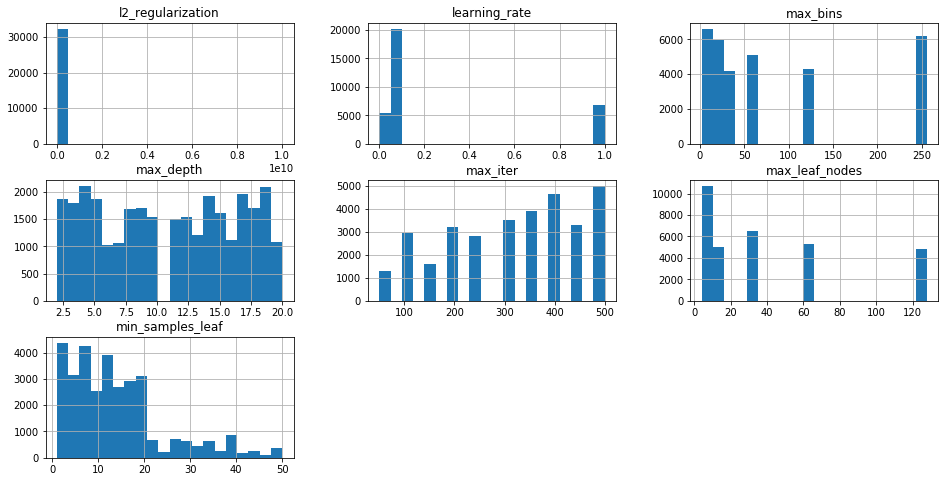

In [84]:
df_params.iloc[:,[2,3,5,6,7,8,9]].hist(figsize = (16,8), bins = 20);

## Use log scale 

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


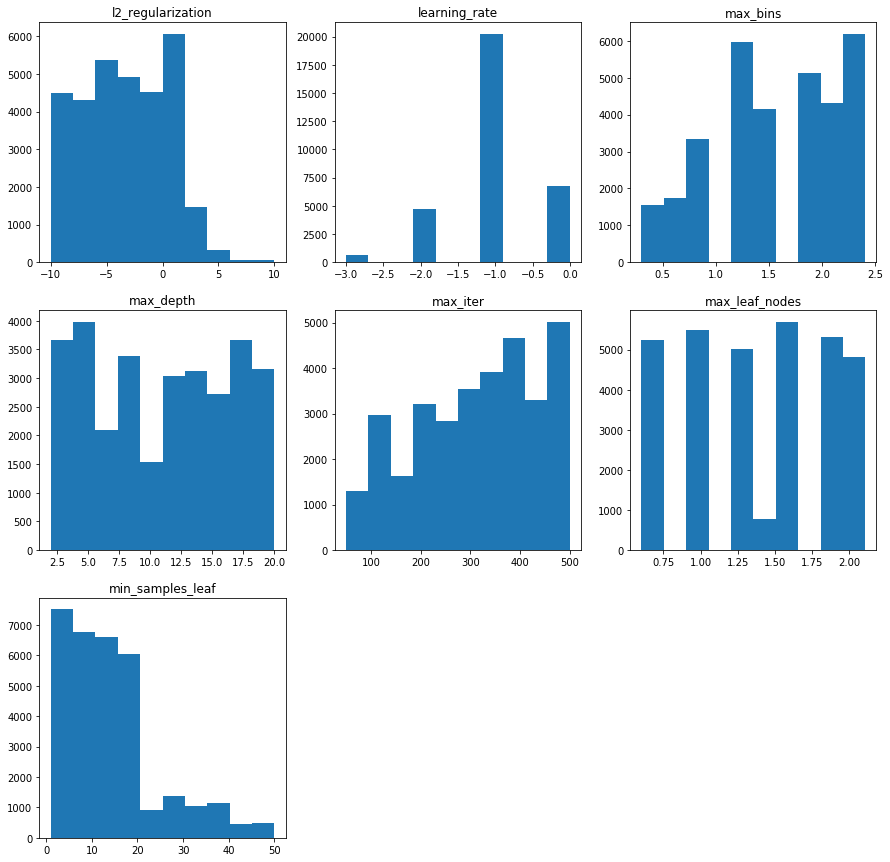

In [85]:
fig = plt.figure(figsize=(15, 15))
count = 1
for  i in ['l2_regularization', 'learning_rate', 'max_bins', 'max_depth', 'max_iter', 'max_leaf_nodes', 'min_samples_leaf']:
    ax = fig.add_subplot(3,3,count)

    if i in ['l2_regularization', 'learning_rate', 'max_bins', 'max_leaf_nodes']:
        ax.hist(np.log10(df_params[i]).replace([np.inf, -np.inf], np.nan))
     #   print(i)
    else:
        ax.hist(df_params[i])

    ax.set_title(i)
    count += 1
    

### Check hyperparameter distributions of top ranked runs

In [86]:
# rank within tasks according to auc
df_params['rank'] = df_params.groupby('task_id')['area_under_roc_curve'].rank('dense', ascending=False)

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


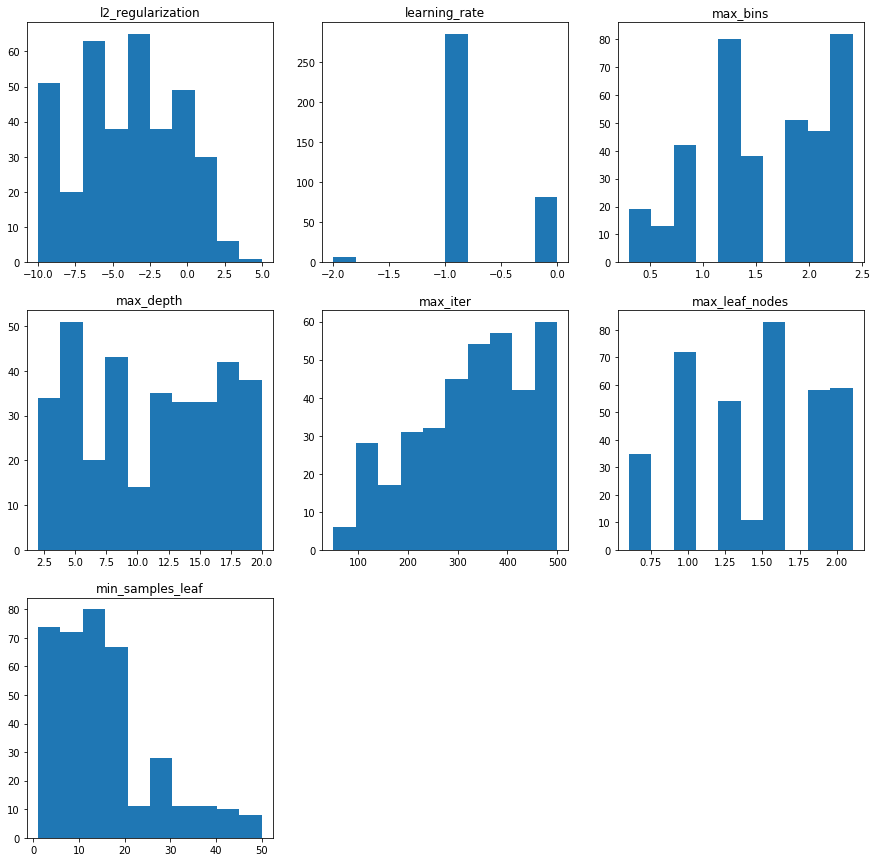

In [87]:

fig = plt.figure(figsize=(15, 15))
count = 1
for  i in ['l2_regularization', 'learning_rate', 'max_bins', 'max_depth', 'max_iter', 'max_leaf_nodes', 'min_samples_leaf']:
    ax = fig.add_subplot(3,3,count)

    if i in ['l2_regularization', 'learning_rate', 'max_bins', 'max_leaf_nodes']:
        ax.hist(np.log10(df_params[df_params['rank'] == 1][i]).replace([np.inf, -np.inf], np.nan))
     #   print(i)
    else:
        ax.hist(df_params[df_params['rank'] == 1][i])

    ax.set_title(i)
    count += 1
    

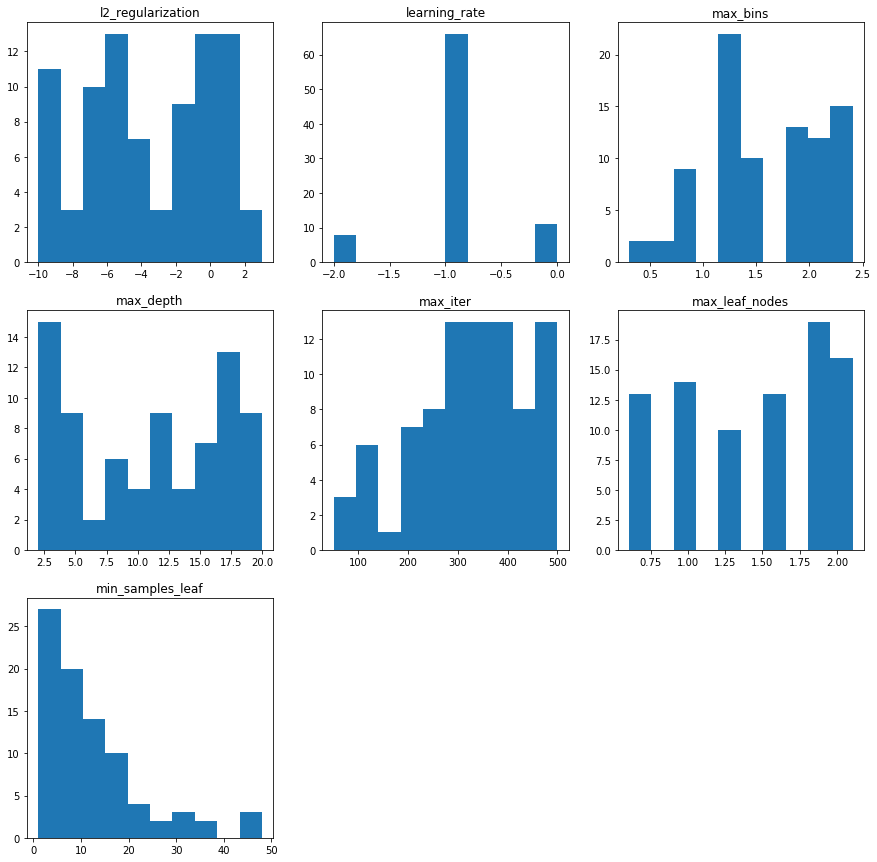

In [88]:

fig = plt.figure(figsize=(15, 15))
count = 1
for  i in ['l2_regularization', 'learning_rate', 'max_bins', 'max_depth', 'max_iter', 'max_leaf_nodes', 'min_samples_leaf']:
    ax = fig.add_subplot(3,3,count)

    if i in ['l2_regularization', 'learning_rate', 'max_bins', 'max_leaf_nodes']:
        ax.hist(np.log10(df_params[df_params['rank'] == 2][i]).replace([np.inf, -np.inf], np.nan))
     #   print(i)
    else:
        ax.hist(df_params[df_params['rank'] == 2][i])

    ax.set_title(i)
    count += 1
    

### Compare with default params 

In [40]:
# check default parameters
model_default = HistGradientBoostingClassifier() 
default_params = list(model_default.get_params().values())
default_params[4] = np.nan

In [41]:
# calculate how many tuned hyperparameters exacly match the default parameters
df_params['default_similarity'] = (df_params.iloc[:,[2,3,5,6,7,8,9]] == [default_params[i] for i in [0,1,3,4,5,6,7]]).astype(int).sum(axis = 1)

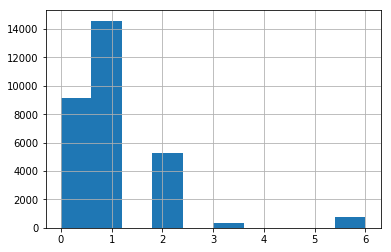

In [42]:
df_params.default_similarity.hist();

In [43]:
# number of runs with default parameters
sum(df_params.default_similarity == 6)

772

In [44]:
# average rank of runs with default parameters
df_params['rank'][df_params.default_similarity == 6].mean()

99.91352859135286

In [45]:
# average rank of all runs
df_params['rank'][df_params.default_similarity != 6].mean()

172.24864775589413

### Rank runs over different tasks

In [47]:
group_cols = list(df_params.columns[[2,3,5,6,7,8,9]])
#group_cols = list(df_params.columns[[2,3,5,6]])
group_cols

['l2_regularization',
 'learning_rate',
 'max_bins',
 'max_depth',
 'max_iter',
 'max_leaf_nodes',
 'min_samples_leaf']

In [48]:
test = df_params.groupby(group_cols).agg({'rank':['count', 'mean']})
test

rank  \
                                                                                            count   
l2_regularization learning_rate max_bins max_depth max_iter max_leaf_nodes min_samples_leaf         
1.000000e-10      0.001         2        7.0       150      32             3                    0   
                                         18.0      200      8              10                   1   
                                4        7.0       50       16             15                   0   
                                8        12.0      450      64             1                    0   
                                         13.0      200      16             7                    0   
                                16       8.0       100      128            8                    0   
                                         11.0      50       32             10                   0   
                                         16.0      500      4              1                    1   
                                32       10.0      200      16             16                   0   
                                                   250      64             5                    0   
                                         11.0      50       4              17                   0   
                                         14.0      400      16             26                   1   
                                64       16.0      500      32             10                   1   
                                128      2.0       50       8              41                   0   
                                         5.0       150      64             14                   0   
                                         14.0      400      16             1                    0   
                                         16.0      400      8              9                    1   
                                         19.0      400      64             10                   1   
                                256      19.0      300      4              1                    0   
                  0.010         2        2.0       50       4              11                   0   
                                         6.0       300      4              16                   1   
                                         8.0       400      32             1                    1   
                                         17.0      350      16             9                    1   
                                         18.0      350      16             18                   1   
                                4        3.0       300      32             23                   1   
                                         5.0       250      64             7                    1   
                                         6.0       350      64             19                   1   
                                         9.0       400      4              19                   1   
                                         11.0      200      32             12                   1   
                                         12.0      450      128            15                   1   
...                                                                                           ...   
1.000000e+09      0.100         2        3.0       200      32             8                    1   
                                         19.0      250      16             25                   0   
                                4        15.0      500      8              50                   0   
                                8        13.0      50       16             27                   0   
                                128      14.0      400      4              40                   0   
                                         17.0      350      128            48                   0   
                  1.000         8        18.0      25